In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as pyplot

In [2]:
from IPython.display import HTML

#HTML('<iframe width="1263" height="480" src="https://www.youtube.com/watch?v=DcfND_C0V3o" title="What are Pulsars?" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [3]:
df = pd.read_csv("Hitter.csv")
df.head()

,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4


Data Understanding¶

In [4]:
df.shape

(322, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Hits      322 non-null    int64 
 1   HmRun     322 non-null    int64 
 2   Runs      322 non-null    int64 
 3   RBI       322 non-null    int64 
 4   Walks     322 non-null    int64 
 5   Years     322 non-null    int64 
 6   CAtBat    322 non-null    int64 
 7   CHits     322 non-null    int64 
 8   CHmRun    322 non-null    int64 
 9   CRuns     322 non-null    int64 
 10  CRBI      322 non-null    int64 
 11  CWalks    322 non-null    int64 
 12  League    322 non-null    int64 
 13  Division  322 non-null    object
 14  PutOuts   322 non-null    object
 15  Assists   322 non-null    int64 
 16  Errors    322 non-null    int64 
 17  Salary    322 non-null    int64 
dtypes: int64(16), object(2)
memory usage: 45.4+ KB


In [6]:
print("Num of Object Variables:", df.select_dtypes(object).shape[1])
print("Num of Integer Variables:", df.select_dtypes("integer").shape[1])
print("Num of Float Variables:", df.select_dtypes("float").shape[1])

Num of Object Variables: 2
Num of Integer Variables: 16
Num of Float Variables: 0


In [7]:
df.Years.value_counts()

22     13
30     12
21     10
15      9
18      8
       ..
97      1
75      1
48      1
8       1
105     1
Name: Years, Length: 89, dtype: int64

In [8]:
def num_plot(df, cat_length = 10, remove = ["Id"], hist_bins = 10, figsize = (17,4)):
    
    num_col = [col for col in df.columns if df[col].dtypes != "O" 
                and len(df[col].unique()) >= cat_length]
    
    if len(remove) > 0:
        num_col = [x for x in num_col if (x not in remove)]
           
    for i in num_col:
        fig, axes = plt.subplots(1, 3, figsize = figsize)
        df.hist(str(i), bins = hist_bins, ax=axes[0])
        df.boxplot(str(i),  ax=axes[1], vert=False);
        try: 
            sns.kdeplot(np.array(df[str(i)]))
        except: ValueError
        
        axes[1].set_yticklabels([])
        axes[1].set_yticks([])
        axes[0].set_title(i + " | Histogram")
        axes[1].set_title(i + " | Boxplot")
        axes[2].set_title(i + " | Density")
        #plt.show()
        
        
#num_plot(df, cat_length = 16, remove = ["Id"], hist_bins = 10, figsize = (20,4))

In [9]:
df.Division.unique()

array(['A', 'N'], dtype=object)

In [10]:
df.PutOuts.unique()   


array(['E', 'W'], dtype=object)

In [11]:
#df.groupby("Division").agg({"Salary": "mean"})

In [12]:
#df.groupby("PutOuts").agg({"Salary": "mean"})

In [13]:
#df.groupby("Division").agg({"CHits": "max"})

In [14]:
#df['Year_lab'] = pd.cut(x=df['Years'], bins=[0, 3, 6, 10, 15, 19, 24])
#df.groupby(['PutOuts','Division', 'Year_lab']).agg({'Salary':'mean'})

In [15]:
df = pd.get_dummies(df, prefix=['Division','PutOuts'])
df.head()

,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Assists,Errors,Salary,Division_A,Division_N,PutOuts_E,PutOuts_W
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,1,0,1,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,0,1,0,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,1,0,0,1
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,0,1,1,0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,0,1,1,0


In [16]:
#df.describe().T

In [17]:
#df.isnull().sum()

## Scaling

In [18]:
#df.hist(edgecolor='black', linewidth=1.2, figsize=(15, 15))

In [19]:
df["Division_A"].dtype

dtype('uint8')

In [20]:
#df["PutOuts"].dtype

In [21]:
col_names = list(df.columns)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df_mm = scaler.fit_transform(df)
df_mm = pd.DataFrame(df_mm, columns = col_names)

In [23]:
df_mm

,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Assists,Errors,Salary,Division_A,Division_N,PutOuts_E,PutOuts_W
0,0.412817,0.274262,0.025,0.230769,0.239669,0.133333,0.000000,0.019524,0.014581,0.001825,0.013401,0.017480,0.008940,0.323657,0.067073,0.62500,1.0,0.0,1.0,0.0
1,0.445604,0.337553,0.175,0.184615,0.314050,0.371429,0.565217,0.244406,0.195437,0.125912,0.147874,0.249548,0.239464,0.458636,0.087398,0.31250,0.0,1.0,0.0,1.0
2,0.690015,0.544304,0.450,0.507692,0.595041,0.723810,0.086957,0.114365,0.106538,0.114964,0.103050,0.160338,0.167944,0.638607,0.166667,0.43750,1.0,0.0,0.0,1.0
3,0.715350,0.590717,0.500,0.500000,0.644628,0.352381,0.434783,0.399672,0.369473,0.410584,0.382163,0.505124,0.226054,0.145138,0.022358,0.09375,0.0,1.0,1.0,0.0
4,0.454545,0.362869,0.250,0.300000,0.347107,0.285714,0.043478,0.026863,0.022813,0.021898,0.021719,0.027728,0.021073,0.584180,0.081301,0.12500,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,0.716841,0.531646,0.175,0.500000,0.396694,0.352381,0.173913,0.191250,0.188617,0.058394,0.174677,0.187462,0.088123,0.235849,0.018293,0.09375,0.0,1.0,1.0,0.0
318,0.709389,0.569620,0.125,0.584615,0.413223,0.895238,0.478261,0.391335,0.354421,0.071168,0.414048,0.271851,0.558748,0.227141,0.774390,0.62500,1.0,0.0,1.0,0.0
319,0.684054,0.527426,0.075,0.469231,0.355372,0.495238,0.217391,0.119781,0.100894,0.012774,0.099815,0.056058,0.093231,0.026851,0.229675,0.21875,1.0,0.0,0.0,1.0
320,0.830104,0.603376,0.225,0.653846,0.495868,0.742857,0.304348,0.226521,0.200611,0.177007,0.216728,0.253165,0.212005,0.953556,0.266260,0.37500,1.0,0.0,1.0,0.0


In [24]:
y = df_mm["Salary"]
X = df_mm.drop( "Salary", axis=1)
X.shape

(322, 19)

In [25]:
print(X.shape)
print(y.shape)

(322, 19)
(322,)


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [27]:
# check the version of  seaborn
sns.__version__

'0.11.2'

D:\D\mosbatedata\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

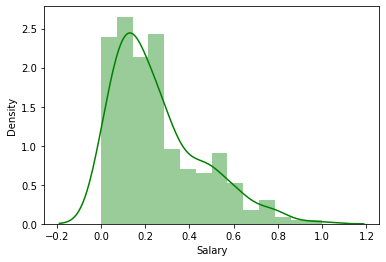

In [28]:
sns.distplot(df_mm.Salary, color="green")

<AxesSubplot:xlabel='Salary', ylabel='Count'>

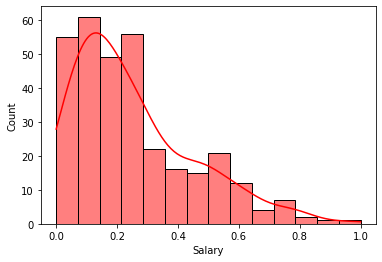

In [29]:
sns.histplot(df_mm.Salary, color= "red", kde=True)

In [30]:
import matplotlib as pyplot

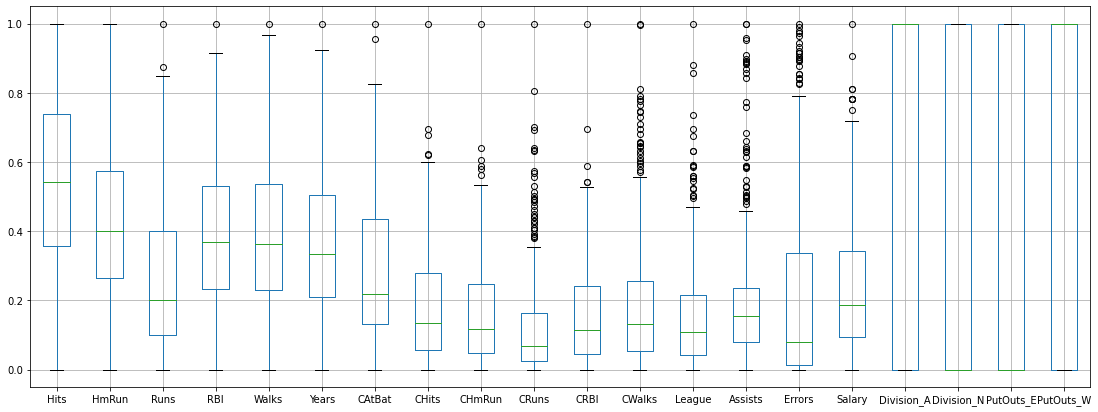

In [31]:
fig = plt.figure(figsize = (19,7))
boxplot = df_mm.boxplot(column = list(df_mm.columns))

In [32]:
#sns.set()
#sns.pairplot(df_mm, size = 2.0)
#plt.show()

In [33]:
#plt.hist(df_mm, bins=5)
#plt.show()

In [34]:
#df_outlier

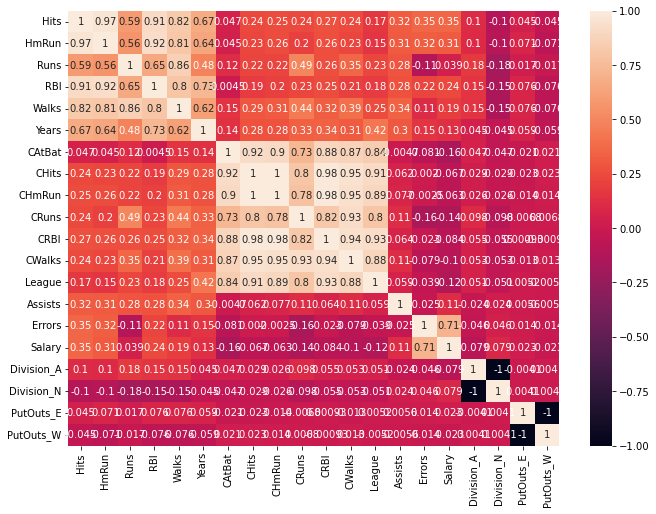

In [35]:
#df_corr
df_mm1 = df_mm.drop(columns="Salary")
corr_Matrix = df_mm.corr()
fig = plt.figure(figsize=(11,8))
sns.heatmap(corr_Matrix,annot=True)
plt.show()

##  Multivariable regression

$$Salary   = \beta_0 + \beta_1 X + \epsilon$$ 

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.3 )
X_test.head()

,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Assists,Errors,Division_A,Division_N,PutOuts_E,PutOuts_W
245,0.463487,0.282700,0.325,0.323077,0.239669,0.428571,0.739130,0.280034,0.219897,0.142336,0.201941,0.229054,0.297573,0.478229,0.107724,1.0,0.0,1.0,0.0
25,0.850969,0.683544,0.100,0.707692,0.421488,0.666667,0.217391,0.190680,0.174741,0.031022,0.203789,0.119349,0.202427,0.314949,0.018293,1.0,0.0,1.0,0.0
220,0.421759,0.312236,0.150,0.292308,0.190083,0.247619,0.086957,0.039974,0.036689,0.014599,0.032348,0.019892,0.028097,0.153846,0.002033,0.0,1.0,1.0,0.0
256,0.281669,0.215190,0.200,0.238462,0.223140,0.161905,0.478261,0.364472,0.310207,0.102190,0.296673,0.268234,0.293103,0.112482,0.006098,1.0,0.0,1.0,0.0
113,0.831595,0.637131,0.775,0.700000,0.834711,0.609524,0.086957,0.068833,0.060207,0.096715,0.067930,0.104280,0.060664,0.909289,0.225610,0.0,1.0,0.0,1.0


In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(225, 19)
(97, 19)
(225,)
(97,)


In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# calculate aic for regression
def calculate_aic(n, mse, num_params):
 aic = n * log(mse) + 2 * num_params
 return aic

In [ ]:
num_params = len(model.coef_) + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = model.predict(X)
# calculate the error
mse = mean_squared_error(y, yhat)
print('MSE: %.3f' % mse)

In [ ]:
aic = calculate_aic(len(y), mse, num_params)
print('AIC: %.3f' % aic)

In [ ]:
# calculate bic for regression
def calculate_bic(n, mse, num_params):
 bic = n * log(mse) + num_params * log(n)
 return bic

In [ ]:
# number of parameters
num_params = len(model.coef_) + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = model.predict(X)
# calculate the error
mse = mean_squared_error(y, yhat)
print('MSE: %.3f' % mse)
# calculate the bic
bic = calculate_bic(len(y), mse, num_params)
print('BIC: %.3f' % bic)

In [ ]:
model.predict(X_test).shape

In [ ]:
r_sq =model.score(X_train,y_train) 
print(f"coefficient of determination: {r_sq}")

In [ ]:
print(f"intercept: {model.intercept_}")

In [ ]:
X.shape

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
y.shape

In [ ]:
from sklearn import metrics 
from sklearn.metrics import mean_squared_error


## MSE

In [ ]:
mean_squared_error(y_train,model.predict(X_train))

In [ ]:
mean_squared_error(y_test,model.predict(X_test))

In [ ]:
#from sklearn.model_selection import cross_val_score

#def rmse_cv(model):
    #rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
   # return(rmse)

### Cross validation 

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
#define predictor and response variables

#define cross-validation method to use
cv = KFold(n_splits = 10, random_state = 1, shuffle = True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores1 = cross_val_score(model, X, y, scoring = 'neg_mean_squared_error', cv = cv)

scores2 = cross_val_score(model, X, y, scoring = 'r2', cv = cv)

#view mean absolute error
print(f"MSE: {np.mean(np.absolute(scores1))}")
print(f"R2 : {np.mean(np.absolute(scores2))}")

## Plot yprediction vs error

In [ ]:
#error = y_train - model.predict(X_train)
#plt.figure(figsize=(5,4))
#plt.scatter(model.predict(X_train),error,color = 'blue')
#plt.axhline(y=0,color = 'r' , linestyle = '-')
#plt.xlabel('fitted value')
#plt.ylabel('error')

## Advanced linear regression with statmodel 

In [ ]:
import statsmodels.api as sm

In [ ]:
X = sm.add_constant(X_train)
#X.head()

In [ ]:
#X = sm.add_constant(X_train)
#model = sm.OLS(y_train , X)
#result = model.fit()

In [ ]:
#print(result.summary())

In [ ]:
#print("Test RMSE:", "{:,.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
#print("Train RMSE:", "{:,.2f}".format(np.sqrt(mean_squared_error(y_train, y_pred1))), "\n")
#print("Train MAE:", "{:,.2f}".format(mean_absolute_error(y_train, y_pred1)))
#print("Test MAE:", "{:,.2f}".format(mean_absolute_error(y_test, y_pred)), "\n")
#print("Train R^2:", "{:,.2f}".format(r2_score(y_train, y_pred1)))
#print("Test R^2:", "{:,.2f}".format(r2_score(y_test, y_pred)))

# Step 4

## Forward and Backward stepwisd regression 

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [ ]:
sfs1=sfs(model, k_features=6,forward= True ,verbose=2 ,scoring='neg_mean_squared_error')

In [ ]:
sfs1= sfs1.fit(X_train , y_train)

In [ ]:
feat_name = list(sfs1.k_feature_names_)
print(feat_name)

In [ ]:
sfs2=sfs(model, k_features=6,forward= True ,verbose=2 ,scoring='r2')
sfs2= sfs2.fit(X_train , y_train)

In [ ]:
feat_name = list(sfs2.k_feature_names_)
print(feat_name)

## Backward stepvise

In [ ]:
sfs3=sfs(model, k_features=6,forward= False ,verbose=2 ,scoring='neg_mean_squared_error')
sfs3= sfs3.fit(X_train , y_train)

In [ ]:
feat_name = list(sfs3.k_feature_names_)
print(feat_name)

## Non- linearity of the response-predictor relationship

In [ ]:
df_mm

In [ ]:
data_step1 = df_mm.loc[:,['Salary','Hits','HmRun','Runs','League','Assists','Errors']]
data_train , data_test= train_test_split(data_step1, test_size=0.2)

In [ ]:
X_train = data_train.loc[:,data_train.columns!= 'Salary']
y_train = data_train['Salary']

In [ ]:
X_test = data_test.loc[:,data_train.columns!= 'Salary']
y_test = data_test['Salary']

In [ ]:
model_1 = LinearRegression()
model_1.fit(X_train,y_train)

In [ ]:
r_sq = model_1.score(X_train,y_train)
print(f'cofficint of determination : {r_sq}')

In [ ]:
error = y_train - model_1.predict(X_train)
plt.figure(figsize=(5,4))
plt.scatter(model_1.predict(X_train),error,color = 'blue')
plt.axhline(y=0,color = 'r' , linestyle = '-')
plt.xlabel('fitted value')
plt.ylabel('error')

#Bakward

1- Mellow’s Cp

where RSS is an regression sum of square associated with the fitted model. Essentially,
the Cp statistic adds a penalty of   Cp = 1/n(RSS + 2dσεˆ2)

to the training RSS in order to adjust for the fact
that the training error tends to underestimate the test error [17].
Clearly, the penalty increases as the number of predictors in the model increases; this
is intended to adjust for the corresponding decrease in training RSS. As a consequence,
the Cp statistic tends to take on a small value for models with a low test error, so when
determining which of a set of models is best, we choose the model with the lowest Cp value


 2- Akaike information criterion

3- Bayesian information criterion (BIC)

4- Adjusted R2

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)